In [32]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/sebastian/Documents/KTH/Year 1/DD2437 Artificial Neural Networks and Deep Architectures/lab_repo/DD2437_ANNs/lab2')
from rdf import *
from helper import *


## Assignment part 1

### Train data and initial testing

In [33]:
# Training data
x_train = np.arange(0,2*np.pi,0.1)
y_sin_train = np.sin(2*x_train)
y_square_train = np.sign(y_sin_train) # # 1 if sin(2x) >= 0, else -1

# Testing data
x_test = np.arange(0.5,2*np.pi,0.1)
y_sin_test = np.sin(2*x_test)
y_square_test = np.sign(y_sin_test) # # 1 if sin(2x) >= 0, else -1

print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

Training samples: 63
Testing samples: 58


In [54]:
#Define RDF parameters
num_centers = 14
centers = np.linspace(0, 2 * np.pi, num_centers)
sigma = 0.5

# Train and test for sin(2x)
rbf_sin_network = RBFNetwork(centers=centers,sigma=sigma)
rbf_sin_network.fit(x_train,y_sin_train)
y_sin_pred_train = rbf_sin_network.predict(x_train)
y_sin_pred_test = rbf_sin_network.predict(x_test)

# Train and test for square(2x)
rbf_square = RBFNetwork(centers, sigma)
rbf_square.fit(x_train, y_square_train)
y_square_pred_train = rbf_square.predict(x_train)
y_square_pred_test = rbf_square.predict(x_test)


absolute_error_sin = np.abs(y_sin_test.reshape(-1,1) - y_sin_pred_test)
absolute_error_square = np.abs(y_square_test.reshape(-1,1) - y_square_pred_test)

print(f"Absolute error for sin(2x) on test set: {np.mean(absolute_error_sin):.4f}")
print(f"Absolute error for square(2x) on test set: {np.mean(absolute_error_square):.4f}")


Absolute error for sin(2x) on test set: 0.0050
Absolute error for square(2x) on test set: 0.1848


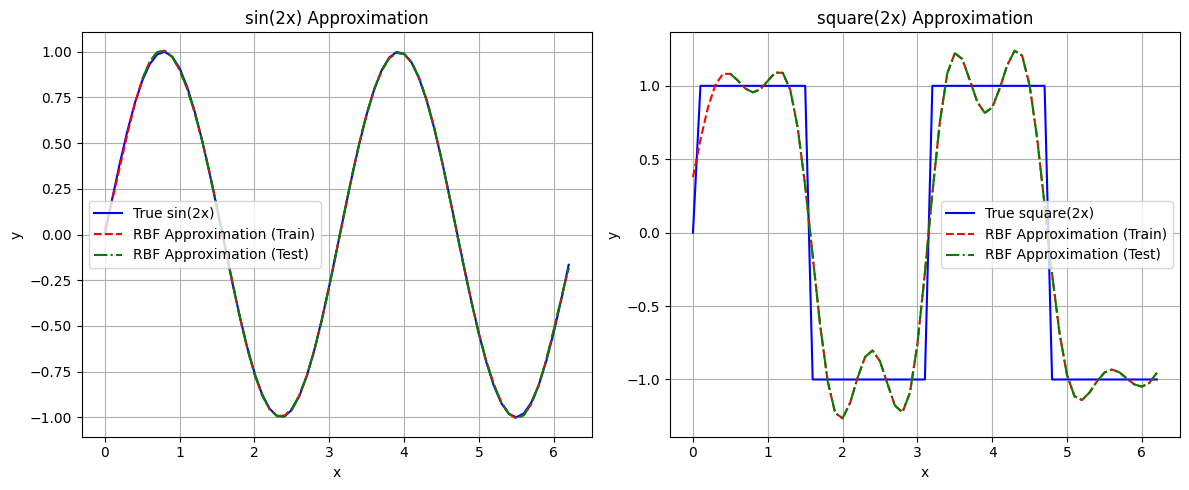

In [55]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(x_train, y_sin_train, label='True sin(2x)', color='blue')
plt.plot(x_train, y_sin_pred_train, label='RBF Approximation (Train)', color='red', linestyle='--')
plt.plot(x_test, y_sin_pred_test, label='RBF Approximation (Test)', color='green', linestyle='-.')
plt.title('sin(2x) Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_train, y_square_train, label='True square(2x)', color='blue')
plt.plot(x_train, y_square_pred_train, label='RBF Approximation (Train)', color='red', linestyle='--')
plt.plot(x_test, y_square_pred_test, label='RBF Approximation (Test)', color='green', linestyle='-.')
plt.title('square(2x) Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Part 3.1 Batch mode training using least squares - supervised learning of network weights

**Try to vary the number of units to obtain the absolute residual error below 0.1, 0.01 and 0.001 in the residual value (absolute residual error is understood as the average absolute difference between the network outputs and the desirable target values). Please discuss the results, how many units are needed for the aforementioned error thresholds?**

In [38]:
absolute_error_sin__test_list = []
absolute_error_square__test_list = []
absolute_error_sin__train_list = []
absolute_error_square__train_list = []

num_centroids = 50
sigma = 0.5


for num_centers in range(1, num_centroids+1): 

    #print(f"Number centroids:{num_centers}")

    centers = np.linspace(0, 2 * np.pi, num_centers)

    # Train and test for sin(2x)
    rbf_sin_network = RBFNetwork(centers=centers,sigma=sigma)
    rbf_sin_network.fit(x_train,y_sin_train)
    y_sin_pred_train = rbf_sin_network.predict(x_train)
    y_sin_pred_test = rbf_sin_network.predict(x_test)


    # Train and test for square(2x)
    rbf_square = RBFNetwork(centers, sigma)
    rbf_square.fit(x_train, y_square_train)
    y_square_pred_train = rbf_square.predict(x_train)
    y_square_pred_test = rbf_square.predict(x_test)

    absolute_error_sin__test_list.append(np.mean(np.abs(y_sin_test.reshape(-1,1) - y_sin_pred_test)))
    absolute_error_square__test_list.append(np.mean(np.abs(y_square_test.reshape(-1,1) - y_square_pred_test)))
    absolute_error_sin__train_list.append(np.mean(np.abs(y_sin_train.reshape(-1,1) - y_sin_pred_train)))
    absolute_error_square__train_list.append(np.mean(np.abs(y_square_train.reshape(-1,1) - y_square_pred_train)))  

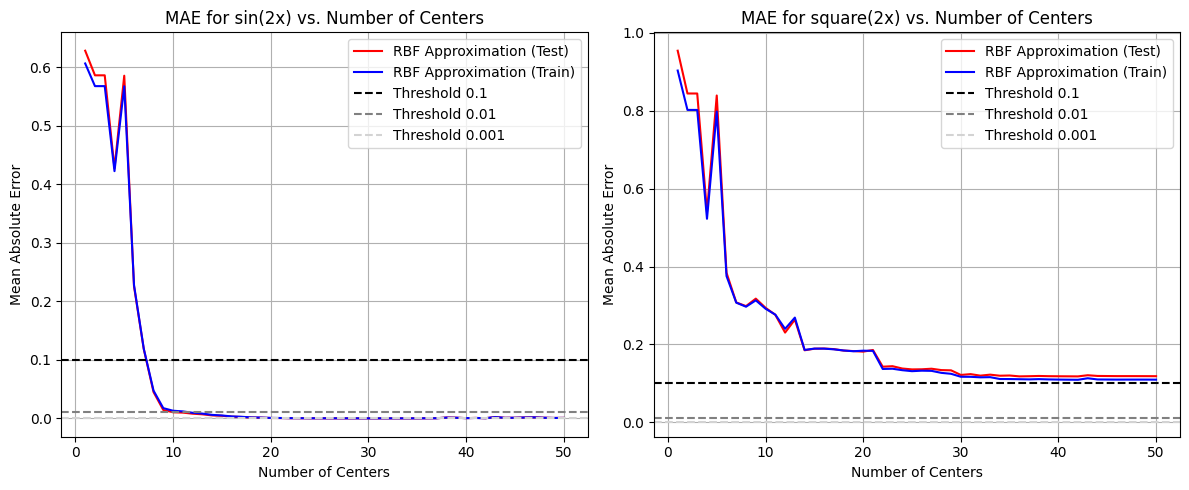

In [39]:
x_axis = list(range(1, num_centroids + 1)) 

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_axis, absolute_error_sin__test_list, color= 'red', label='RBF Approximation (Test)')
plt.plot(x_axis, absolute_error_sin__train_list, color= 'blue', label='RBF Approximation (Train)')

plt.axhline(y=0.1, color='black', linestyle='--', label='Threshold 0.1')
plt.axhline(y=0.01, color='gray', linestyle='--', label='Threshold 0.01')
plt.axhline(y=0.001, color='lightgray', linestyle='--', label='Threshold 0.001')

plt.xlabel('Number of Centers')
plt.ylabel('Mean Absolute Error')
plt.title('MAE for sin(2x) vs. Number of Centers')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_axis, absolute_error_square__test_list, color= 'red', label='RBF Approximation (Test)')
plt.plot(x_axis, absolute_error_square__train_list, color= 'blue', label='RBF Approximation (Train)')

plt.axhline(y=0.1, color='black', linestyle='--', label='Threshold 0.1')
plt.axhline(y=0.01, color='gray', linestyle='--', label='Threshold 0.01')
plt.axhline(y=0.001, color='lightgray', linestyle='--', label='Threshold 0.001')

plt.xlabel('Number of Centers')
plt.ylabel('Mean Absolute Error')
plt.title('MAE for square(2x) vs. Number of Centers')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

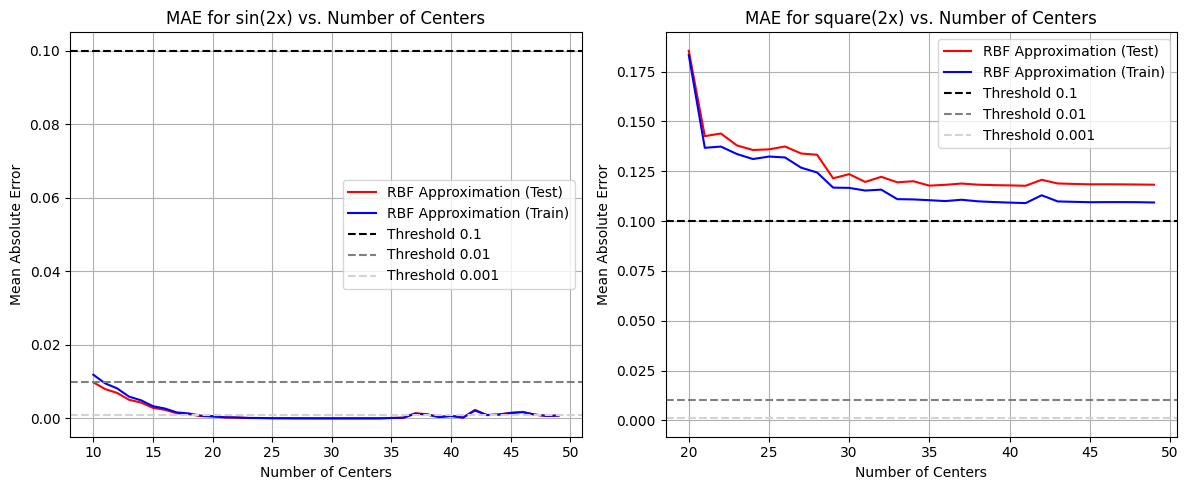

In [40]:
zoom = 10
x_axis = list(range(zoom, num_centroids))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_axis, absolute_error_sin__test_list[zoom:], color='red', label='RBF Approximation (Test)')
plt.plot(x_axis, absolute_error_sin__train_list[zoom:], color='blue', label='RBF Approximation (Train)')

plt.axhline(y=0.1, color='black', linestyle='--', label='Threshold 0.1')
plt.axhline(y=0.01, color='gray', linestyle='--', label='Threshold 0.01')
plt.axhline(y=0.001, color='lightgray', linestyle='--', label='Threshold 0.001')

plt.xlabel('Number of Centers')
plt.ylabel('Mean Absolute Error')
plt.title('MAE for sin(2x) vs. Number of Centers')
plt.grid(True)
#plt.yscale('log')
plt.legend()

zoom = 20
x_axis = list(range(zoom, num_centroids))

plt.subplot(1, 2, 2)
plt.plot(x_axis, absolute_error_square__test_list[zoom:], color='red', label='RBF Approximation (Test)')
plt.plot(x_axis, absolute_error_square__train_list[zoom:], color='blue', label='RBF Approximation (Train)')

plt.axhline(y=0.1, color='black', linestyle='--', label='Threshold 0.1')
plt.axhline(y=0.01, color='gray', linestyle='--', label='Threshold 0.01')
plt.axhline(y=0.001, color='lightgray', linestyle='--', label='Threshold 0.001')

plt.xlabel('Number of Centers')
plt.ylabel('Mean Absolute Error')
plt.title('MAE for square(2x) vs. Number of Centers')
plt.grid(True)
#plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()

**How can you simply transform the output of your RBF network to re- duce the residual error to 0 for the square(2x) problem? Still, how many units do you need? In what type of applications could this transform be particularly useful?**

In [41]:
absolute_error_square__test_list = []
absolute_error_square__train_list = []

num_centroids = 10
sigma = 0.5


for num_centers in range(1, num_centroids+1): 

    centers = np.linspace(0, 2 * np.pi, num_centers)

    # Train and test for square(2x)
    rbf_square = RBFNetwork(centers, sigma)
    rbf_square.fit(x_train, y_square_train)
    y_square_pred_train = rbf_square.predict(x_train)
    y_square_pred_test = rbf_square.predict(x_test)
    y_square_pred_test_threshold = np.sign(y_square_pred_test)
    y_square_pred_train_threshold = np.sign(y_square_pred_train)
    

    absolute_error_square__test_list.append(np.mean(np.abs(y_square_test.reshape(-1,1) - y_square_pred_test_threshold)))
    absolute_error_square__train_list.append(np.mean(np.abs(y_square_train.reshape(-1,1) - y_square_pred_train_threshold)))  

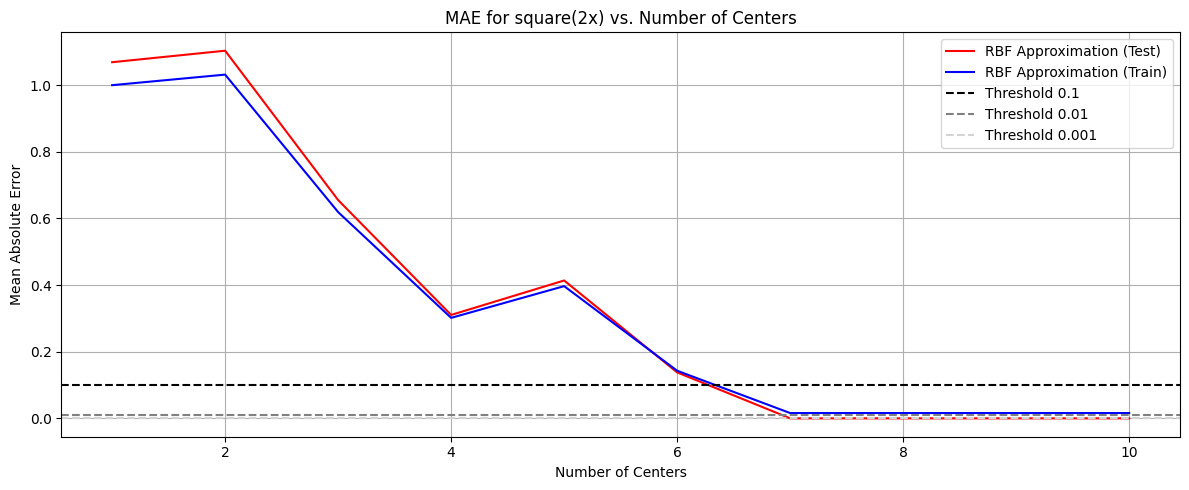

In [42]:
x_axis = list(range(1, num_centroids + 1)) 

plt.figure(figsize=(12, 5))

plt.plot(x_axis, absolute_error_square__test_list, color= 'red', label='RBF Approximation (Test)')
plt.plot(x_axis, absolute_error_square__train_list, color= 'blue', label='RBF Approximation (Train)')

plt.axhline(y=0.1, color='black', linestyle='--', label='Threshold 0.1')
plt.axhline(y=0.01, color='gray', linestyle='--', label='Threshold 0.01')
plt.axhline(y=0.001, color='lightgray', linestyle='--', label='Threshold 0.001')

plt.xlabel('Number of Centers')
plt.ylabel('Mean Absolute Error')
plt.title('MAE for square(2x) vs. Number of Centers')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [45]:
#Define RDF parameters
num_centers = 6
centers = np.linspace(0, 2 * np.pi, num_centers)
sigma = 0.5

# Train and test for square(2x)
rbf_square = RBFNetwork(centers, sigma)
rbf_square.fit(x_train, y_square_train)
y_square_pred_train = rbf_square.predict(x_train)
y_square_pred_test = rbf_square.predict(x_test)
y_square_pred_test_threshold = np.sign(y_square_pred_test)
y_square_pred_train_threshold = np.sign(y_square_pred_train)

absolute_error_square = np.abs(y_square_test.reshape(-1,1) - y_square_pred_test_threshold)


print(f"Absolute error for square(2x) on test set: {np.mean(absolute_error_square):.4f}")


Absolute error for square(2x) on test set: 0.1379


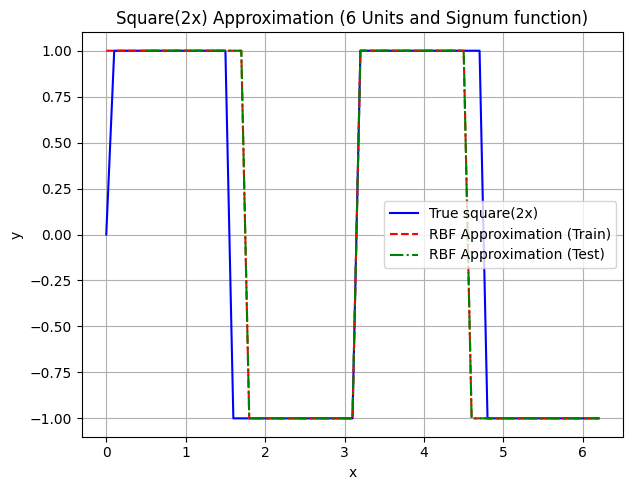

In [47]:
plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 2)
plt.plot(x_train, y_square_train, label='True square(2x)', color='blue')
plt.plot(x_train, y_square_pred_train_threshold, label='RBF Approximation (Train)', color='red', linestyle='--')
plt.plot(x_test, y_square_pred_test_threshold, label='RBF Approximation (Test)', color='green', linestyle='-.')
plt.title('Square(2x) Approximation (6 Units and Signum function)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [12]:
#TODO We should probably also look into how different variances for different number of centroids affect the performance 
#       -> Create a heatmap (different number of centroids, different variances)

### 3.1 Regression with noise

In [13]:
# Training data
x_train = np.arange(0,2*np.pi,0.1)
y_sin_train = np.sin(2*x_train)
y_square_train = np.sign(y_sin_train) # # 1 if sin(2x) >= 0, else -1

# Testing data
x_test = np.arange(0.5,2*np.pi,0.1)
y_sin_test = np.sin(2*x_test)
y_square_test = np.sign(y_sin_test) # # 1 if sin(2x) >= 0, else -1

#Adding zero-mean Gaussian noise with the variance of 0.1 (both training and testing set)

np.random.seed(41)
variance=0.1

noise_01_train = np.random.normal(0,np.sqrt(variance),x_train.shape)
noise_01_test = np.random.normal(0,np.sqrt(variance),x_test.shape)

y_sin_test_noise = y_sin_test + noise_01_test
y_sin_train_noise = y_sin_train + noise_01_train

y_square_test_noise = y_square_test + noise_01_test
y_square_train_noise = y_square_train + noise_01_train


print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

Training samples: 63
Testing samples: 58


#### Experiments with noisy data

In [14]:
import numpy as np

#parameters
num_centers_list = [5, 10, 15, 20, 25]  
sigma_list = [0.1, 0.5, 1.0, 2.0, 5.0]  
eta_list = [0.001, 0.01, 0.1]  
num_epochs = 100

results_batch = {}
results_online = {}


#batch learning experiments
for sigma in sigma_list:
    for num_centers in num_centers_list:
        centers = np.linspace(0, 2 * np.pi, num_centers)
        
        #sin
        rbf_sin = RBFNetwork(centers, sigma)
        rbf_sin.fit(x_train, y_sin_train_noise)
        y_pred_sin = rbf_sin.predict(x_test)
        mae_sin = mae(y_sin_test_noise.reshape(-1,1), y_pred_sin)
        
        #square
        rbf_square = RBFNetwork(centers, sigma)
        rbf_square.fit(x_train, y_square_train_noise)
        y_pred_square = rbf_square.predict(x_test)
        mae_square = mae(y_square_test_noise.reshape(-1,1), y_pred_square)
        
        #safe results
        key = f"sigma_{sigma}_centers_{num_centers}"
        results_batch[key] = {'sin': mae_sin, 'square': mae_square}

#online learning experiments
for eta in eta_list:
    for sigma in sigma_list:
        for num_centers in num_centers_list:
            centers = np.linspace(0, 2 * np.pi, num_centers)
            
            # Sin
            rbf_sin = RBFNetwork(centers, sigma)
            train_hist_sin, test_hist_sin = rbf_sin.fit_online(x_train, y_sin_train_noise, x_test, y_sin_test_noise, eta, num_epochs)
            mae_sin_online = test_hist_sin[-1]  
            
            # Square
            rbf_square = RBFNetwork(centers, sigma)
            train_hist_square, test_hist_square = rbf_square.fit_online(x_train, y_square_train_noise, x_test, y_square_test_noise, eta, num_epochs)
            mae_square_online = test_hist_square[-1]
            
            key = f"eta_{eta}_sigma_{sigma}_centers_{num_centers}"
            results_online[key] = {'sin': mae_sin_online, 'square': mae_square_online, 'train_hist_sin': train_hist_sin, 'test_hist_sin': test_hist_sin, 'train_hist_square': train_hist_square, 'test_hist_square': test_hist_square}



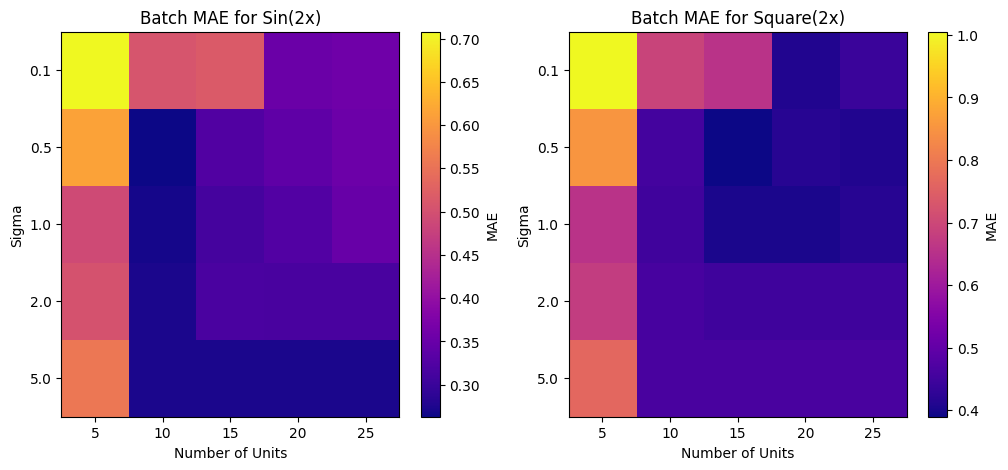

In [15]:
#heatmap for batch: sigma vs centers
mae_sin_batch_matrix = np.zeros((len(sigma_list), len(num_centers_list)))
mae_square_batch_matrix = np.zeros((len(sigma_list), len(num_centers_list)))

for i, sigma in enumerate(sigma_list):
    for j, num_centers in enumerate(num_centers_list):
        key = f"sigma_{sigma}_centers_{num_centers}"
        mae_sin_batch_matrix[i, j] = results_batch[key]['sin']
        mae_square_batch_matrix[i, j] = results_batch[key]['square']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(mae_sin_batch_matrix, cmap='plasma', aspect='auto')
plt.colorbar(label='MAE')
plt.xticks(range(len(num_centers_list)), num_centers_list)
plt.yticks(range(len(sigma_list)), sigma_list)
plt.xlabel('Number of Units')
plt.ylabel('Sigma')
plt.title('Batch MAE for Sin(2x)')

plt.subplot(1, 2, 2)
plt.imshow(mae_square_batch_matrix, cmap='plasma', aspect='auto')
plt.colorbar(label='MAE')
plt.xticks(range(len(num_centers_list)), num_centers_list)
plt.yticks(range(len(sigma_list)), sigma_list)
plt.xlabel('Number of Units')
plt.ylabel('Sigma')
plt.title('Batch MAE for Square(2x)')
plt.show()

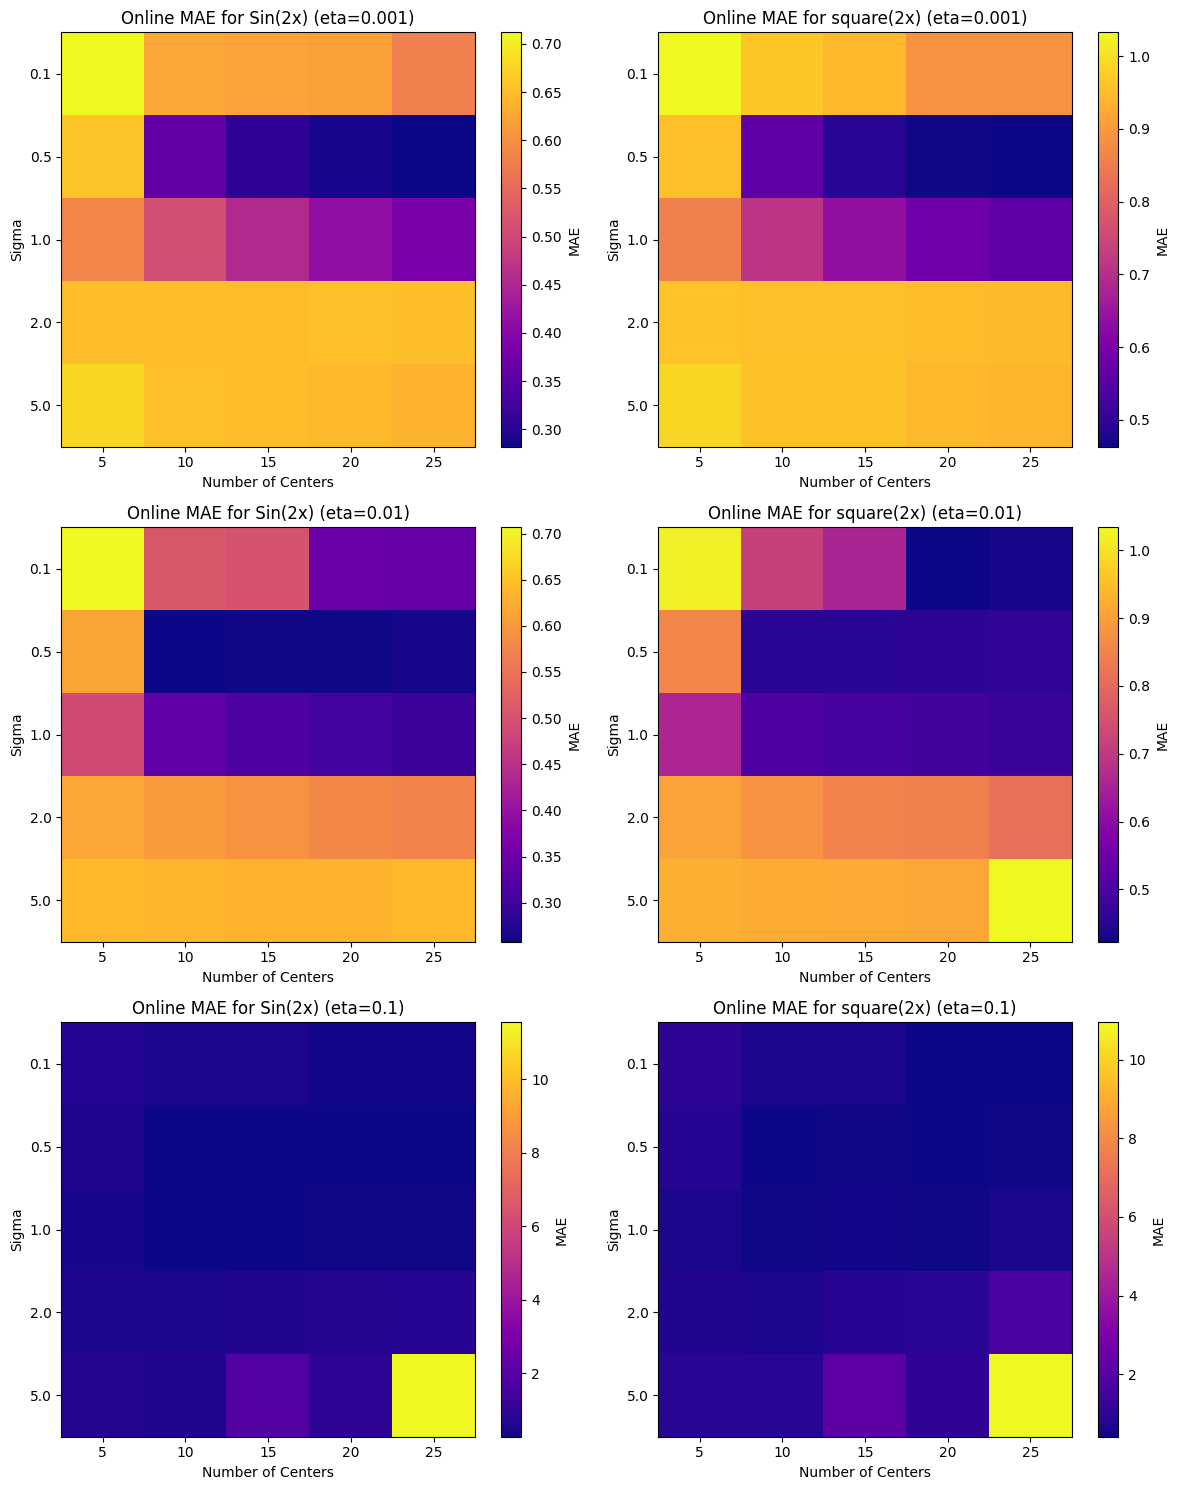

In [16]:
plt.figure(figsize=(12, 15)) #shows 6*2 images

for idx, eta in enumerate(eta_list):
    mae_sin_online_matrix = np.zeros((len(sigma_list), len(num_centers_list)))
    mae_square_online_matrix = np.zeros((len(sigma_list), len(num_centers_list)))

    for i, sigma in enumerate(sigma_list):
        for j, num_centers in enumerate(num_centers_list):
            key = f"eta_{eta}_sigma_{sigma}_centers_{num_centers}"
            mae_sin_online_matrix[i, j] = results_online[key]['sin']
            mae_square_online_matrix[i, j] = results_online[key]['square']

    plt.subplot(3, 2, 2*idx + 1)
    plt.imshow(mae_sin_online_matrix, cmap='plasma', aspect='auto')
    plt.colorbar(label='MAE')
    plt.xticks(range(len(num_centers_list)), num_centers_list)
    plt.yticks(range(len(sigma_list)), sigma_list)
    plt.xlabel('Number of Centers')
    plt.ylabel('Sigma')
    plt.title(f'Online MAE for Sin(2x) (eta={eta})')

    plt.subplot(3, 2, 2*idx + 2)
    plt.imshow(mae_square_online_matrix, cmap='plasma', aspect='auto')
    plt.colorbar(label='MAE')
    plt.xticks(range(len(num_centers_list)), num_centers_list)
    plt.yticks(range(len(sigma_list)), sigma_list)
    plt.xlabel('Number of Centers')
    plt.ylabel('Sigma')
    plt.title(f'Online MAE for square(2x) (eta={eta})')

plt.tight_layout()
plt.show()

### Experiments with clean data

In [42]:
import numpy as np

#parameters
num_centers_list = [5, 10, 15, 20, 25]  
sigma_list = [0.1, 0.5, 1.0, 2.0, 5.0]  
eta_list = [0.001, 0.01, 0.1]  
num_epochs = 100

results_batch = {}
results_online = {}


#batch learning experiments
for sigma in sigma_list:
    for num_centers in num_centers_list:
        centers = np.linspace(0, 2 * np.pi, num_centers)
        
        #sin
        rbf_sin = RBFNetwork(centers, sigma)
        rbf_sin.fit(x_train, y_sin_train_noise)
        y_pred_sin = rbf_sin.predict(x_test)
        mae_sin = mae(y_sin_test_noise.reshape(-1,1), y_pred_sin)
        
        #square
        rbf_square = RBFNetwork(centers, sigma)
        rbf_square.fit(x_train, y_square_train_noise)
        y_pred_square = rbf_square.predict(x_test)
        mae_square = mae(y_square_test_noise.reshape(-1,1), y_pred_square)
        
        #safe results
        key = f"sigma_{sigma}_centers_{num_centers}"
        results_batch[key] = {'sin': mae_sin, 'square': mae_square}

#online learning experiments
for eta in eta_list:
    for sigma in sigma_list:
        for num_centers in num_centers_list:
            centers = np.linspace(0, 2 * np.pi, num_centers)
            
            # Sin
            rbf_sin = RBFNetwork(centers, sigma)
            train_hist_sin, test_hist_sin = rbf_sin.fit_online(x_train, y_sin_train, x_test, y_sin_test, eta, num_epochs)
            mae_sin_online = test_hist_sin[-1]  
            
            # Square
            rbf_square = RBFNetwork(centers, sigma)
            train_hist_square, test_hist_square = rbf_square.fit_online(x_train, y_square_train, x_test, y_square_test, eta, num_epochs)
            mae_square_online = test_hist_square[-1]
            
            key = f"eta_{eta}_sigma_{sigma}_centers_{num_centers}"
            results_online[key] = {'sin': mae_sin_online, 'square': mae_square_online, 'train_hist_sin': train_hist_sin, 'test_hist_sin': test_hist_sin, 'train_hist_square': train_hist_square, 'test_hist_square': test_hist_square}



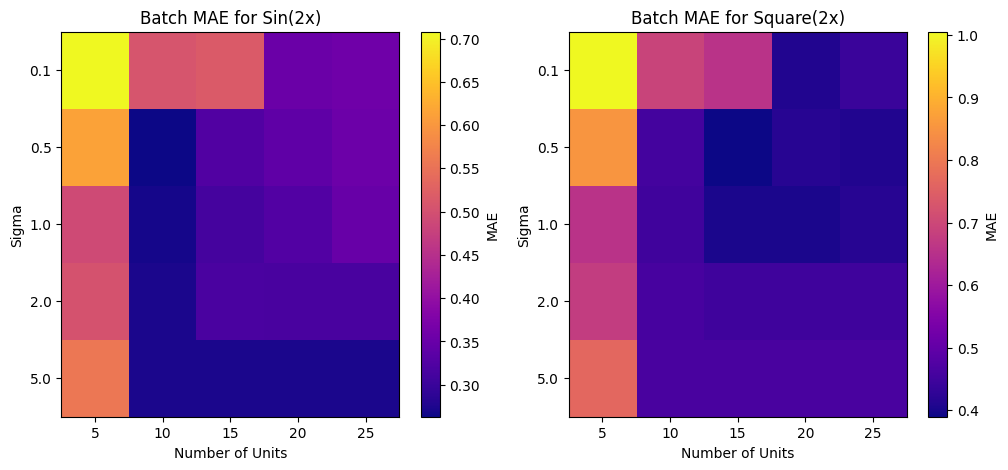

In [43]:
#heatmap for batch: sigma vs centers
mae_sin_batch_matrix = np.zeros((len(sigma_list), len(num_centers_list)))
mae_square_batch_matrix = np.zeros((len(sigma_list), len(num_centers_list)))

for i, sigma in enumerate(sigma_list):
    for j, num_centers in enumerate(num_centers_list):
        key = f"sigma_{sigma}_centers_{num_centers}"
        mae_sin_batch_matrix[i, j] = results_batch[key]['sin']
        mae_square_batch_matrix[i, j] = results_batch[key]['square']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(mae_sin_batch_matrix, cmap='plasma', aspect='auto')
plt.colorbar(label='MAE')
plt.xticks(range(len(num_centers_list)), num_centers_list)
plt.yticks(range(len(sigma_list)), sigma_list)
plt.xlabel('Number of Units')
plt.ylabel('Sigma')
plt.title('Batch MAE for Sin(2x)')

plt.subplot(1, 2, 2)
plt.imshow(mae_square_batch_matrix, cmap='plasma', aspect='auto')
plt.colorbar(label='MAE')
plt.xticks(range(len(num_centers_list)), num_centers_list)
plt.yticks(range(len(sigma_list)), sigma_list)
plt.xlabel('Number of Units')
plt.ylabel('Sigma')
plt.title('Batch MAE for Square(2x)')
plt.show()

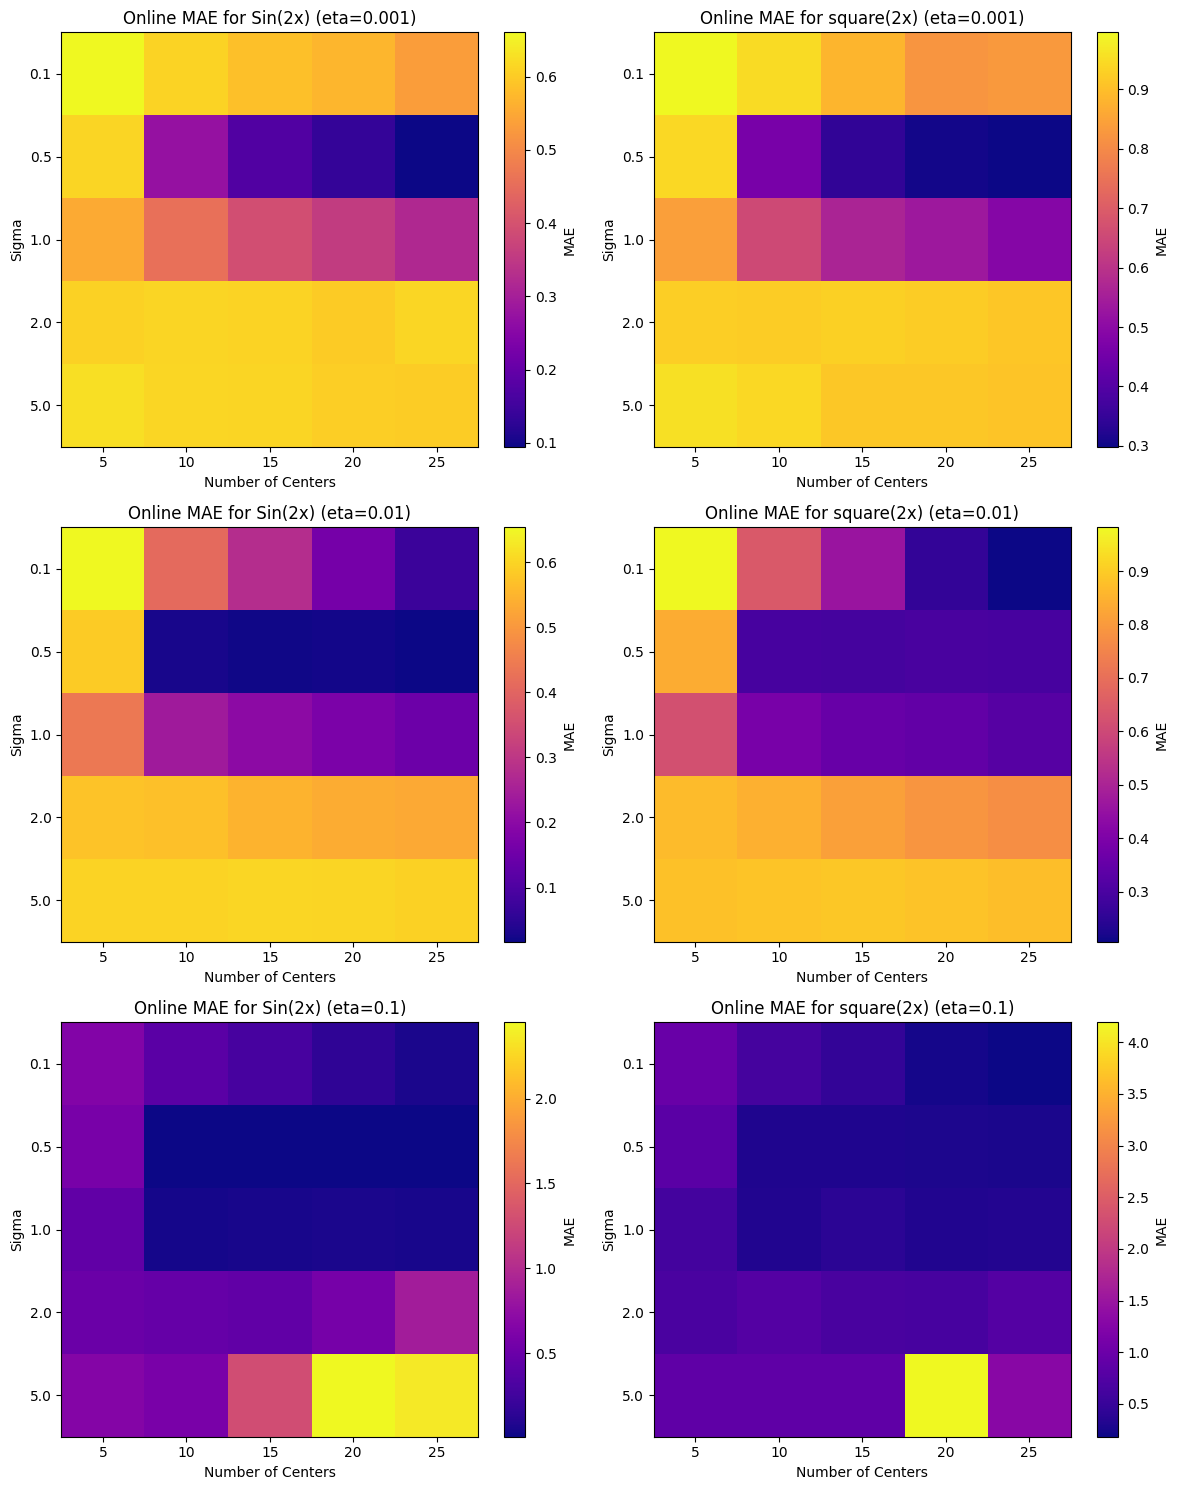

In [44]:
plt.figure(figsize=(12, 15)) #shows 6*2 images

for idx, eta in enumerate(eta_list):
    mae_sin_online_matrix = np.zeros((len(sigma_list), len(num_centers_list)))
    mae_square_online_matrix = np.zeros((len(sigma_list), len(num_centers_list)))

    for i, sigma in enumerate(sigma_list):
        for j, num_centers in enumerate(num_centers_list):
            key = f"eta_{eta}_sigma_{sigma}_centers_{num_centers}"
            mae_sin_online_matrix[i, j] = results_online[key]['sin']
            mae_square_online_matrix[i, j] = results_online[key]['square']

    plt.subplot(3, 2, 2*idx + 1)
    plt.imshow(mae_sin_online_matrix, cmap='plasma', aspect='auto')
    plt.colorbar(label='MAE')
    plt.xticks(range(len(num_centers_list)), num_centers_list)
    plt.yticks(range(len(sigma_list)), sigma_list)
    plt.xlabel('Number of Centers')
    plt.ylabel('Sigma')
    plt.title(f'Online MAE for Sin(2x) (eta={eta})')

    plt.subplot(3, 2, 2*idx + 2)
    plt.imshow(mae_square_online_matrix, cmap='plasma', aspect='auto')
    plt.colorbar(label='MAE')
    plt.xticks(range(len(num_centers_list)), num_centers_list)
    plt.yticks(range(len(sigma_list)), sigma_list)
    plt.xlabel('Number of Centers')
    plt.ylabel('Sigma')
    plt.title(f'Online MAE for square(2x) (eta={eta})')

plt.tight_layout()
plt.show()

In [40]:
# Positioning comparison: evenly distributed vs random
num_centers_pos = 10
sigma_pos = 0.5

centers_linspace = np.linspace(0, 2 * np.pi, num_centers_pos)
centers_random = np.random.uniform(0, 2 * np.pi, num_centers_pos)

#batch with evenly distributed
rbf_sin_lin = RBFNetwork(centers_linspace, sigma_pos)
rbf_sin_lin.fit(x_train, y_sin_train_noise)
mae_sin_lin = mae(y_sin_test_noise, rbf_sin_lin.predict(x_test))

rbf_square_lin = RBFNetwork(centers_linspace, sigma_pos)
rbf_square_lin.fit(x_train, y_square_train_noise)
mae_square_lin = mae(y_square_test_noise, rbf_square_lin.predict(x_test))

#batch with random
rbf_sin_rand = RBFNetwork(centers_random, sigma_pos)
rbf_sin_rand.fit(x_train, y_sin_train_noise)
mae_sin_rand = mae(y_sin_test_noise, rbf_sin_rand.predict(x_test))

rbf_square_rand = RBFNetwork(centers_random, sigma_pos)
rbf_square_rand.fit(x_train, y_square_train_noise)
mae_square_rand = mae(y_square_test_noise, rbf_square_rand.predict(x_test))

print(f"MAE Sin -------------------------------------\n Evenly distributed: {mae_sin_lin:.4f}, Random: {mae_sin_rand:.4f}\n---------------------------------------------")
print(f"MAE Square ----------------------------------\n- Evenly distributed: {mae_square_lin:.4f}, Random: {mae_square_rand:.4f}\n---------------------------------------------")

#test on clean data
mae_sin_clean = mae(y_sin_test, rbf_sin_lin.predict(x_test))
mae_square_clean = mae(y_square_test, rbf_square_lin.predict(x_test))

print(f"Clean data MAE (evenly distributed) - Sin: {mae_sin_clean:.4f}, Square: {mae_square_clean:.4f}")

MAE Sin -------------------------------------
 Evenly distributed: 0.2630, Random: 0.3036
---------------------------------------------
MAE Square ----------------------------------
- Evenly distributed: 0.4547, Random: 0.4695
---------------------------------------------
Clean data MAE (evenly distributed) - Sin: 0.0875, Square: 0.3148


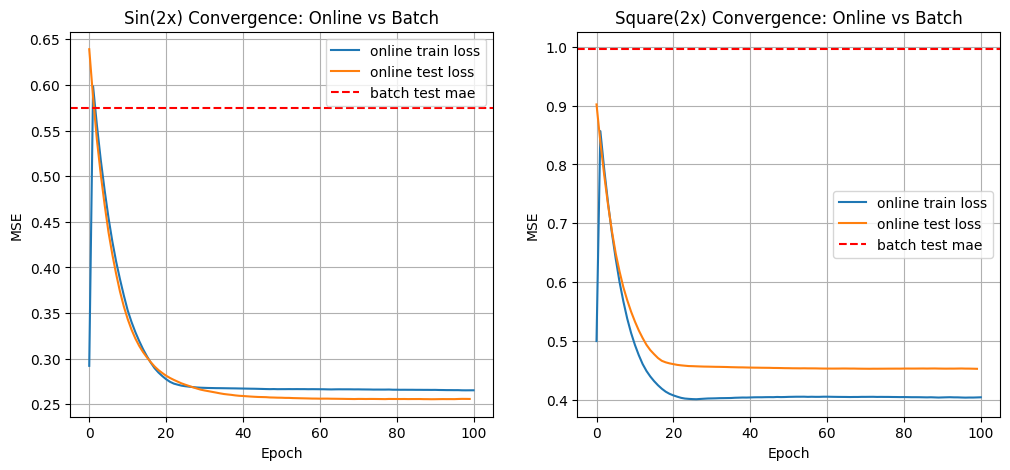

In [ ]:
# Plot comparison of batch vs online for fixed sigma and centers
# Used mse for direct comparison
fixed_sigma = 0.5
fixed_centers = 10
fixed_eta = 0.01

centers_fixed = np.linspace(0, 2 * np.pi, fixed_centers)

# Batch
rbf_sin_batch = RBFNetwork(centers_fixed, fixed_sigma)
rbf_sin_batch.fit(x_train, y_sin_train_noise)
mse_batch_sin = mse(y_sin_test_noise, rbf_sin_batch.predict(x_test))

rbf_square_batch = RBFNetwork(centers_fixed, fixed_sigma)
rbf_square_batch.fit(x_train, y_square_train_noise)
mse_batch_square = mse(y_square_test_noise, rbf_square_batch.predict(x_test))

# Online
rbf_sin_online = RBFNetwork(centers_fixed, fixed_sigma)
train_hist_sin, test_hist_sin = rbf_sin_online.fit_online(x_train, y_sin_train_noise, x_test, y_sin_test_noise, fixed_eta, num_epochs)

rbf_square_online = RBFNetwork(centers_fixed, fixed_sigma)
train_hist_square, test_hist_square = rbf_square_online.fit_online(x_train, y_square_train_noise, x_test, y_square_test_noise, fixed_eta, num_epochs)

# Plot convergence
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_hist_sin)), train_hist_sin, label='online train loss')
plt.plot(range(len(test_hist_sin)), test_hist_sin, label='online test loss')
plt.axhline(y=mse_batch_sin, color='red', linestyle='--', label='batch test mae')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Sin(2x) Convergence: Online vs Batch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(len(train_hist_square)), train_hist_square, label='online train loss')
plt.plot(range(len(test_hist_square)), test_hist_square, label='online test loss')
plt.axhline(y=mse_batch_square, color='red', linestyle='--', label='batch test mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Square(2x) Convergence: Online vs Batch')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#TODO compare with single-hidden-layer perceptron trained with backprop.
# -> Its the last part of 3.2 that is missing.

## 3.3 Competitive learning (CL) to initialise RBG units

**Best performing model configurations from 3.1 and 3.2**

Delta rule (online): 

- Number of units: 20
- Sigma : 0.5
- Eta = 0.01 

Evenly distributed nodes performed best.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/sebastian/Documents/KTH/Year 1/DD2437 Artificial Neural Networks and Deep Architectures/lab_repo/DD2437_ANNs/lab2')
from rdf import *
from helper import *

In [21]:
# Training data
x_train = np.arange(0,2*np.pi,0.1)
y_sin_train = np.sin(2*x_train)
y_square_train = np.sign(y_sin_train) # # 1 if sin(2x) >= 0, else -1

# Testing data
x_test = np.arange(0.5,2*np.pi,0.1)
y_sin_test = np.sin(2*x_test)
y_square_test = np.sign(y_sin_test) # # 1 if sin(2x) >= 0, else -1

#Adding zero-mean Gaussian noise with the variance of 0.1 (both training and testing set)

np.random.seed(41)
variance=0.1

noise_01_train = np.random.normal(0,np.sqrt(variance),x_train.shape)
noise_01_test = np.random.normal(0,np.sqrt(variance),x_test.shape)

y_sin_test_noise = y_sin_test + noise_01_test
y_sin_train_noise = y_sin_train + noise_01_train

y_square_test_noise = y_square_test + noise_01_test
y_square_train_noise = y_square_train + noise_01_train


print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

Training samples: 63
Testing samples: 58


Final wins per Unit: [14. 10. 11. 12. 16.]
Average Quantization Error (AQE): 2.0800212903492286
Average Distance per Unit: [1.67679002 2.73863049 1.9514319  1.61763069 2.41562335]
Computed widths (sigma): [0.20466345 0.15002833 0.16070709 0.17828979 0.23453751]
Final centers:
 [[2.29344109]
 [5.80297537]
 [4.64612687]
 [3.61113674]
 [0.80282283]]
Final wins per Unit: [12.  6.  5.  7.  7.  4.  7.  7.  4.  4.]
Average Quantization Error (AQE): 2.1173160905787065
Average Distance per Unit: [1.66857428 2.83659337 1.9323592  1.60235726 2.17779033 2.32315162
 2.79533692 2.37001133 1.64574623 1.82124037]
Computed widths (sigma): [0.17186875 0.08715773 0.10041085 0.16934528 0.17723082 0.07450123
 0.10011086 0.10047067 0.07579355 0.08017772]
Final centers:
 [[2.33070747]
 [5.91950733]
 [4.60223942]
 [3.51165384]
 [1.16059438]
 [0.92709079]
 [0.32975879]
 [5.33481429]
 [3.76848997]
 [4.34364197]]
Final wins per Unit: [10.  3.  4.  7.  1.  3.  4.  4.  4.  4.  3.  3.  4.  7.  2.]
Average Quantizat

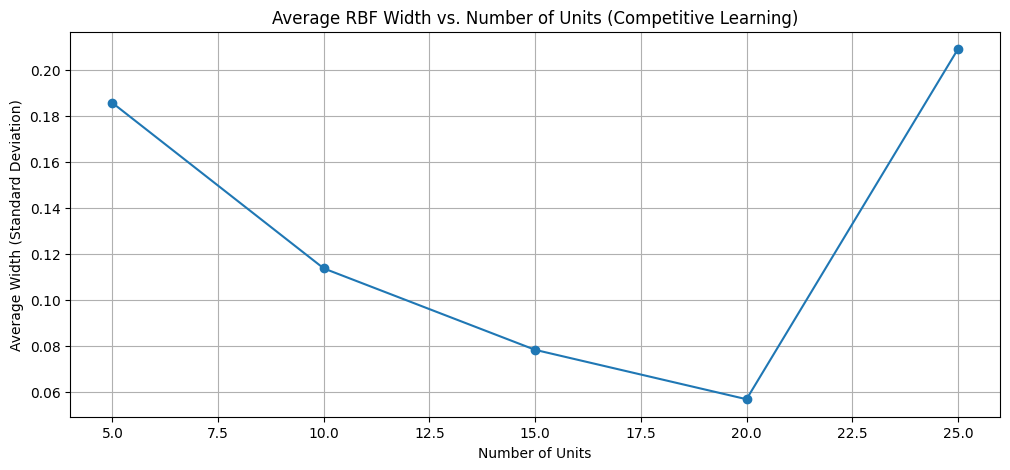

In [22]:
num_centers_list = [5, 10, 15, 20, 25] 
avg_standard_distribution_list = []
rbf = RBFNetwork()

for num_units in num_centers_list: 

    _, widths,_ = rbf.fit_rbf_units(X=x_train,num_units=num_units, epochs=10)
    avg_standard_distribution_list.append(np.mean(widths))



plt.figure(figsize=(12,5))
plt.plot(num_centers_list, avg_standard_distribution_list, marker='o')
plt.xlabel('Number of Units')
plt.ylabel('Average Width (Standard Deviation)')
plt.title('Average RBF Width vs. Number of Units (Competitive Learning)')
plt.grid(True)
plt.show()

Final wins per Unit: [14. 10. 11. 12. 16.]
Average Quantization Error (AQE): 2.0800212903492286
Average Distance per Unit: [1.67679002 2.73863049 1.9514319  1.61763069 2.41562335]
Computed widths (sigma): [0.20466345 0.15002833 0.16070709 0.17828979 0.23453751]
Final centers:
 [[2.29344109]
 [5.80297537]
 [4.64612687]
 [3.61113674]
 [0.80282283]]
Final wins per Unit: [12.  6.  5.  7.  7.  4.  7.  7.  4.  4.]
Average Quantization Error (AQE): 2.1173160905787065
Average Distance per Unit: [1.66857428 2.83659337 1.9323592  1.60235726 2.17779033 2.32315162
 2.79533692 2.37001133 1.64574623 1.82124037]
Computed widths (sigma): [0.17186875 0.08715773 0.10041085 0.16934528 0.17723082 0.07450123
 0.10011086 0.10047067 0.07579355 0.08017772]
Final centers:
 [[2.33070747]
 [5.91950733]
 [4.60223942]
 [3.51165384]
 [1.16059438]
 [0.92709079]
 [0.32975879]
 [5.33481429]
 [3.76848997]
 [4.34364197]]
Final wins per Unit: [10.  3.  4.  7.  1.  3.  4.  4.  4.  4.  3.  3.  4.  7.  2.]
Average Quantizat

/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_72066/3160341079.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(width_distributions, labels=num_centers_list)


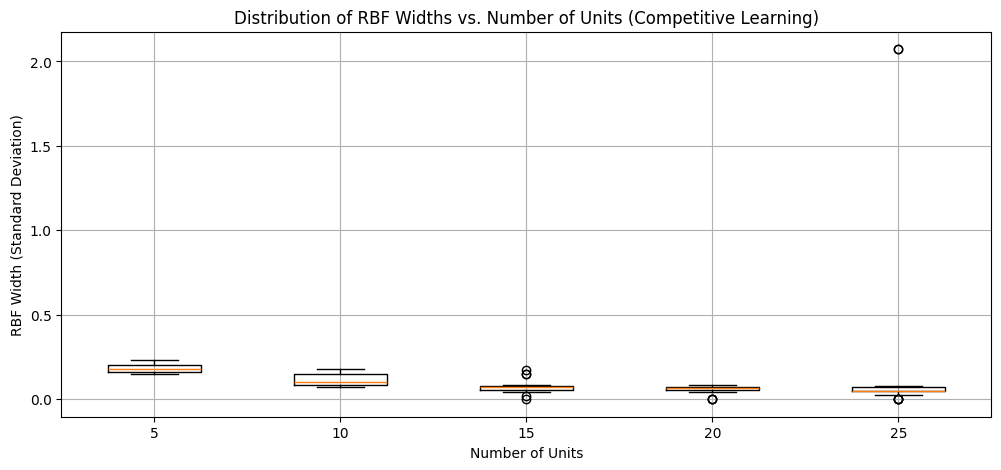

In [23]:
num_centers_list = [5, 10, 15, 20, 25]
width_distributions = [] 
rbf = RBFNetwork()

for num_units in num_centers_list:
    _, widths,_ = rbf.fit_rbf_units(X=x_train, num_units=num_units, epochs=10)
    width_distributions.append(widths)

plt.figure(figsize=(12, 5))
plt.boxplot(width_distributions, labels=num_centers_list)
plt.xlabel('Number of Units')
plt.ylabel('RBF Width (Standard Deviation)')
plt.title('Distribution of RBF Widths vs. Number of Units (Competitive Learning)')
plt.grid(True)
plt.show()

Final wins per Unit: [14. 10. 11. 12. 16.]
Average Quantization Error (AQE): 2.0800212903492286
Average Distance per Unit: [1.67679002 2.73863049 1.9514319  1.61763069 2.41562335]
Computed widths (sigma): [0.20466345 0.15002833 0.16070709 0.17828979 0.23453751]
Final centers:
 [[2.29344109]
 [5.80297537]
 [4.64612687]
 [3.61113674]
 [0.80282283]]
Final wins per Unit: [12.  6.  5.  7.  7.  4.  7.  7.  4.  4.]
Average Quantization Error (AQE): 2.1173160905787065
Average Distance per Unit: [1.66857428 2.83659337 1.9323592  1.60235726 2.17779033 2.32315162
 2.79533692 2.37001133 1.64574623 1.82124037]
Computed widths (sigma): [0.17186875 0.08715773 0.10041085 0.16934528 0.17723082 0.07450123
 0.10011086 0.10047067 0.07579355 0.08017772]
Final centers:
 [[2.33070747]
 [5.91950733]
 [4.60223942]
 [3.51165384]
 [1.16059438]
 [0.92709079]
 [0.32975879]
 [5.33481429]
 [3.76848997]
 [4.34364197]]
Final wins per Unit: [10.  3.  4.  7.  1.  3.  4.  4.  4.  4.  3.  3.  4.  7.  2.]
Average Quantizat

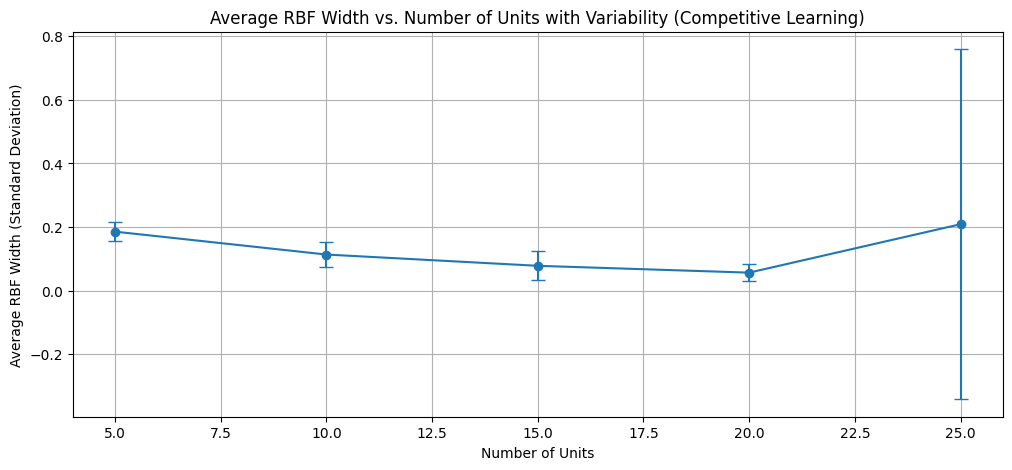

In [24]:
import numpy as np
import matplotlib.pyplot as plt

num_centers_list = [5, 10, 15, 20, 25]
avg_widths = []
std_widths = []  
rbf = RBFNetwork()

for num_units in num_centers_list:
    _, widths,_ = rbf.fit_rbf_units(X=x_train, num_units=num_units, epochs=10)
    avg_widths.append(np.mean(widths))
    std_widths.append(np.std(widths))

plt.figure(figsize=(12, 5))
plt.errorbar(num_centers_list, avg_widths, yerr=std_widths, fmt='o-', capsize=5)
plt.xlabel('Number of Units')
plt.ylabel('Average RBF Width (Standard Deviation)')
plt.title('Average RBF Width vs. Number of Units with Variability (Competitive Learning)')
plt.grid(True)
plt.show()

Final wins per Unit: [63.]
Average Quantization Error (AQE): 1.5770839092458369
Average Distance per Unit: [1.57708391]
Computed widths (sigma): [0.90934296]
Final centers:
 [[3.14042767]]
Final wins per Unit: [34. 29.]
Average Quantization Error (AQE): 2.004523478297052
Average Distance per Unit: [1.88612123 2.12292572]
Computed widths (sigma): [0.49334492 0.42842191]
Final centers:
 [[1.72987138]
 [4.93486391]]
Final wins per Unit: [28. 14. 21.]
Average Quantization Error (AQE): 2.126657232253984
Average Distance per Unit: [2.00753628 2.65402974 1.71840568]
Computed widths (sigma): [0.41276818 0.22915749 0.34020946]
Final centers:
 [[1.47351973]
 [5.70231203]
 [4.02308786]]
Final wins per Unit: [24. 10. 12. 17.]
Average Quantization Error (AQE): 2.091469734731748
Average Distance per Unit: [2.09915954 2.73395075 1.94104384 1.59172481]
Computed widths (sigma): [0.36392543 0.15002909 0.17286346 0.27905228]
Final centers:
 [[1.30803986]
 [5.80301511]
 [4.6232585 ]
 [3.39025563]]
Final w

/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_72066/4131319453.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(width_distributions, labels=num_centers_list)


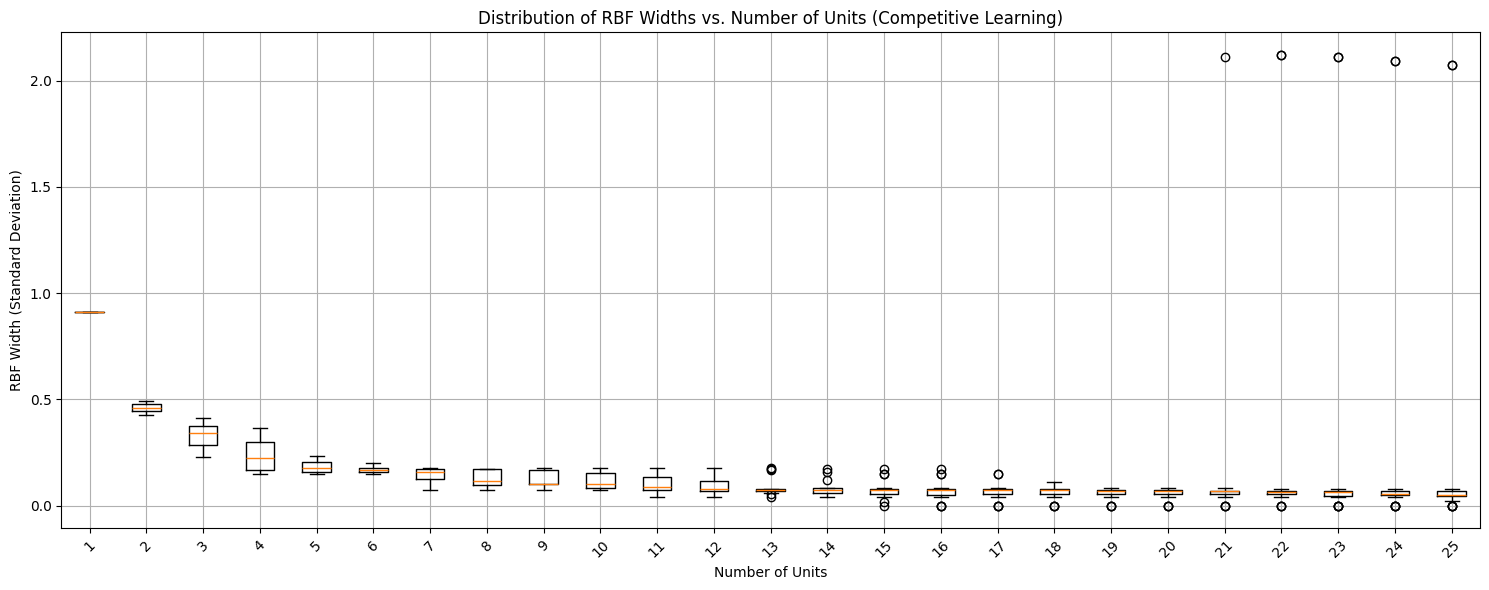

In [25]:
num_centers_list = list(range(1, 26))
width_distributions = [] 
rbf = RBFNetwork()

for num_units in num_centers_list:
    _, widths,_ = rbf.fit_rbf_units(X=x_train, num_units=num_units, epochs=10)
    width_distributions.append(widths)


plt.figure(figsize=(15, 6))
plt.boxplot(width_distributions, labels=num_centers_list)
plt.xlabel('Number of Units')
plt.ylabel('RBF Width (Standard Deviation)')
plt.title('Distribution of RBF Widths vs. Number of Units (Competitive Learning)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()  

Final wins per Unit: [4. 3. 4. 3. 1. 3. 4. 4. 3. 4. 3. 3. 4. 3. 1. 1. 3. 5. 4. 3.]
Average Quantization Error (AQE): 2.134725322847337
Average Distance per Unit: [1.67109361 2.81286031 1.90456649 1.63409141 2.29671445 2.2982747
 2.76533569 2.39446905 1.6377815  1.83864286 2.97847871 2.92414913
 2.24870583 2.0795698  2.19272738 2.18619283 1.80805224 1.57883351
 1.60287664 1.84109033]
Computed widths (sigma): [0.0566891  0.07492269 0.08636483 0.08164966 0.         0.08164966
 0.07739094 0.07436225 0.08164966 0.10175537 0.04086101 0.0689977
 0.08611044 0.06673821 0.         0.         0.08164966 0.07512259
 0.0726189  0.08164966]
Final centers:
 [[2.32328569]
 [5.89163397]
 [4.5427417 ]
 [3.70835562]
 [0.96764242]
 [0.96219113]
 [0.36367999]
 [5.37342321]
 [3.73203403]
 [4.38449185]
 [0.12682331]
 [6.01600197]
 [5.15674514]
 [1.31900235]
 [1.12704165]
 [1.13773688]
 [1.88966895]
 [3.25088844]
 [2.68090357]
 [1.80247373]]
Final wins per Unit: [4. 3. 4. 3. 1. 3. 4. 4. 3. 4. 3. 3. 4. 3. 1. 1

Text(0.5, 0, 'Epochs')

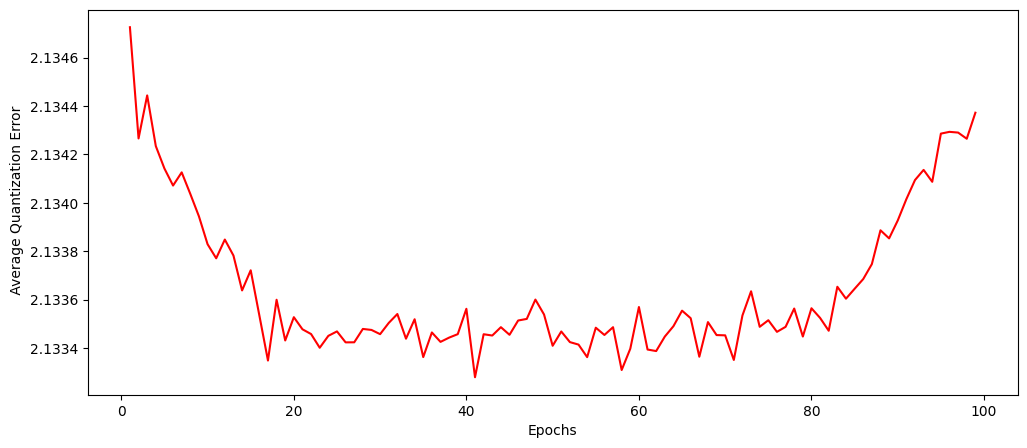

In [26]:
epochs = list(range(1,100))

rbf = RBFNetwork()

avg_quantization_error = []


for epoch in epochs:

    _,_,error = rbf.fit_rbf_units(X=x_train,num_units = 20, epochs=epoch)
    avg_quantization_error.append(error)



plt.figure(figsize=(12,5))
plt.plot(epochs,avg_quantization_error,color='red')
plt.ylabel(" Average Quantization Error")
plt.xlabel("Epochs")

In [27]:
num_units = 5
sigma = 0.5
eta = 0.01

In [28]:
#clean data

num_units = 5
sigma = 0.5
eta = 0.01
num_epochs = 100

centers_fixed = np.linspace(0, 2 * np.pi, num_units)

# Delta rule-> manual placed units
rbf_sin_online_manual = RBFNetwork(centers=centers_fixed, sigma=sigma)
train_hist_sin_manual, test_hist_sin_manual = rbf_sin_online_manual.fit_online(x_train, y_sin_train, x_test, y_sin_test, eta, num_epochs)

rbf_square_online_manual = RBFNetwork(centers=centers_fixed, sigma=sigma)
train_hist_square_manual, test_hist_square_manual = rbf_square_online_manual.fit_online(x_train, y_square_train, x_test, y_square_test, eta, num_epochs)


# Delta rule -> competitive learning

rbf_sin_online_competetive = RBFNetwork()
rbf_sin_online_competetive.fit_rbf_units(X=x_train, num_units=num_units, epochs=20)
train_hist_sin_competitive, test_hist_sin_competitive = rbf_sin_online_competetive.fit_online(x_train, y_sin_train, x_test, y_sin_test, eta, num_epochs)

rbf_square_online_competitive = RBFNetwork()
rbf_square_online_competitive.fit_rbf_units(X=x_train, num_units=num_units, epochs=20)
train_hist_square_competitive, test_hist_square_competitive = rbf_square_online_competitive.fit_online(x_train, y_square_train, x_test, y_square_test, eta, num_epochs)

Final wins per Unit: [14. 10. 11. 12. 16.]
Average Quantization Error (AQE): 2.083474144489912
Average Distance per Unit: [1.68726529 2.70710279 1.97071089 1.61062874 2.44166302]
Computed widths (sigma): [0.20026623 0.14289199 0.15829265 0.17174796 0.22927226]
Final centers:
 [[2.26032301]
 [5.77044801]
 [4.68255203]
 [3.56818505]
 [0.75810976]]
Final wins per Unit: [14. 10. 11. 12. 16.]
Average Quantization Error (AQE): 2.083474144489912
Average Distance per Unit: [1.68726529 2.70710279 1.97071089 1.61062874 2.44166302]
Computed widths (sigma): [0.20026623 0.14289199 0.15829265 0.17174796 0.22927226]
Final centers:
 [[2.26032301]
 [5.77044801]
 [4.68255203]
 [3.56818505]
 [0.75810976]]


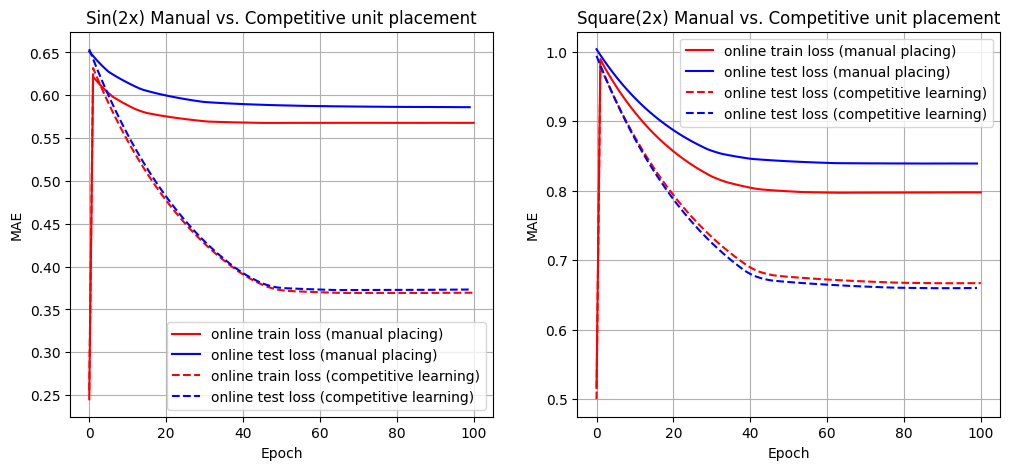

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_hist_sin_manual)), train_hist_sin_manual, color='red', label='online train loss (manual placing)')
plt.plot(range(len(test_hist_sin_manual)), test_hist_sin_manual, color='blue', label='online test loss (manual placing)')
plt.plot(range(len(train_hist_sin_competitive)), train_hist_sin_competitive,color='red', linestyle='--', label='online train loss (competitive learning)')
plt.plot(range(len(test_hist_sin_competitive)), test_hist_sin_competitive,color='blue', linestyle='--', label='online test loss (competitive learning)')

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Sin(2x) Manual vs. Competitive unit placement')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(len(train_hist_sin_manual)), train_hist_square_manual, color='red', label='online train loss (manual placing)')
plt.plot(range(len(test_hist_sin_manual)), test_hist_square_manual, color='blue', label='online test loss (manual placing)')
plt.plot(range(len(train_hist_sin_competitive)), train_hist_square_competitive,color='red', linestyle='--', label='online test loss (competitive learning)')
plt.plot(range(len(test_hist_sin_competitive)), test_hist_square_competitive,color='blue', linestyle='--', label='online test loss (competitive learning)')

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Square(2x) Manual vs. Competitive unit placement')
plt.legend()
plt.grid(True)


In [16]:
#no noisy data

num_units = 5
sigma = 0.5
eta = 0.01
num_epochs = 100

centers_fixed = np.linspace(0, 2 * np.pi, num_units)

# Delta rule-> manual placed units
rbf_sin_online_manual = RBFNetwork(centers=centers_fixed, sigma=sigma)
train_hist_sin_manual, test_hist_sin_manual = rbf_sin_online_manual.fit_online(x_train, y_sin_train_noise, x_test, y_sin_test_noise, eta, num_epochs)

rbf_square_online_manual = RBFNetwork(centers=centers_fixed, sigma=sigma)
train_hist_square_manual, test_hist_square_manual = rbf_square_online_manual.fit_online(x_train, y_square_train_noise, x_test, y_square_test_noise, eta, num_epochs)


# Delta rule -> competitive learning

rbf_sin_online_competetive = RBFNetwork()
rbf_sin_online_competetive.fit_rbf_units(X=x_train, num_units=num_units, epochs=20)
train_hist_sin_competitive, test_hist_sin_competitive = rbf_sin_online_competetive.fit_online(x_train, y_sin_train_noise, x_test, y_sin_test_noise, eta, num_epochs)

rbf_square_online_competitive = RBFNetwork()
rbf_square_online_competitive.fit_rbf_units(X=x_train, num_units=num_units, epochs=20)
train_hist_square_competitive, test_hist_square_competitive = rbf_square_online_competitive.fit_online(x_train, y_square_train_noise, x_test, y_square_test_noise, eta, num_epochs)

Final wins per Unit: [14. 10. 11. 12. 16.]
Average Quantization Error (AQE): 2.083474144489912
Average Distance per Unit: [1.68726529 2.70710279 1.97071089 1.61062874 2.44166302]
Computed widths (sigma): [0.20026623 0.14289199 0.15829265 0.17174796 0.22927226]
Final centers:
 [[2.26032301]
 [5.77044801]
 [4.68255203]
 [3.56818505]
 [0.75810976]]
Final wins per Unit: [14. 10. 11. 12. 16.]
Average Quantization Error (AQE): 2.083474144489912
Average Distance per Unit: [1.68726529 2.70710279 1.97071089 1.61062874 2.44166302]
Computed widths (sigma): [0.20026623 0.14289199 0.15829265 0.17174796 0.22927226]
Final centers:
 [[2.26032301]
 [5.77044801]
 [4.68255203]
 [3.56818505]
 [0.75810976]]


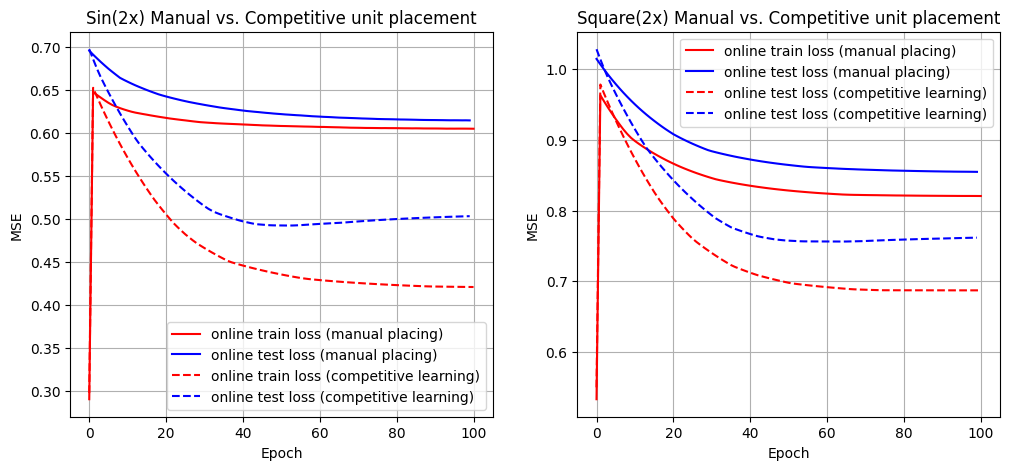

In [17]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_hist_sin_manual)), train_hist_sin_manual, color='red', label='online train loss (manual placing)')
plt.plot(range(len(test_hist_sin_manual)), test_hist_sin_manual, color='blue', label='online test loss (manual placing)')
plt.plot(range(len(train_hist_sin_competitive)), train_hist_sin_competitive,color='red', linestyle='--', label='online train loss (competitive learning)')
plt.plot(range(len(test_hist_sin_competitive)), test_hist_sin_competitive,color='blue', linestyle='--', label='online test loss (competitive learning)')

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Sin(2x) Manual vs. Competitive unit placement')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(len(train_hist_sin_manual)), train_hist_square_manual, color='red', label='online train loss (manual placing)')
plt.plot(range(len(test_hist_sin_manual)), test_hist_square_manual, color='blue', label='online test loss (manual placing)')
plt.plot(range(len(train_hist_sin_competitive)), train_hist_square_competitive,color='red', linestyle='--', label='online test loss (competitive learning)')
plt.plot(range(len(test_hist_sin_competitive)), test_hist_square_competitive,color='blue', linestyle='--', label='online test loss (competitive learning)')

plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Square(2x) Manual vs. Competitive unit placement')
plt.legend()
plt.grid(True)


### Avoid dead units

Final wins per Unit: [11.  6.  5.  7.  7.  4.  7.  7.  5.  4.]
Average Quantization Error (AQE): 2.1127226818853315
Average Distance per Unit: [1.67268662 2.84817277 1.95159753 1.58798334 2.10303099 2.34167665
 2.80695229 2.35588332 1.6505618  1.80868152]
Computed widths (sigma): [0.15817051 0.0832857  0.0781382  0.1525939  0.12859709 0.07072537
 0.10052503 0.10030427 0.07259525 0.07155335]
Final centers:
 [[2.32075054]
 [5.93357317]
 [4.64106412]
 [3.37574224]
 [1.2816055 ]
 [0.90166447]
 [0.31463303]
 [5.31711221]
 [3.79177267]
 [4.31264292]]
Final wins per Unit: [12.  7.  5.  6.  6.  3.  8.  5.  5.  6.]
Average Quantization Error (AQE): 2.0895101407018966
Average Distance per Unit: [1.71258739 2.74059337 1.97329567 1.5949896  2.17492779 2.24794289
 2.61679383 2.40423638 1.60386311 1.82587139]
Computed widths (sigma): [0.18002095 0.12029054 0.10435975 0.17078251 0.14466922 0.08164966
 0.16913803 0.09248179 0.13245253 0.10957537]
Final centers:
 [[2.17239488]
 [5.8074505 ]
 [4.6876888

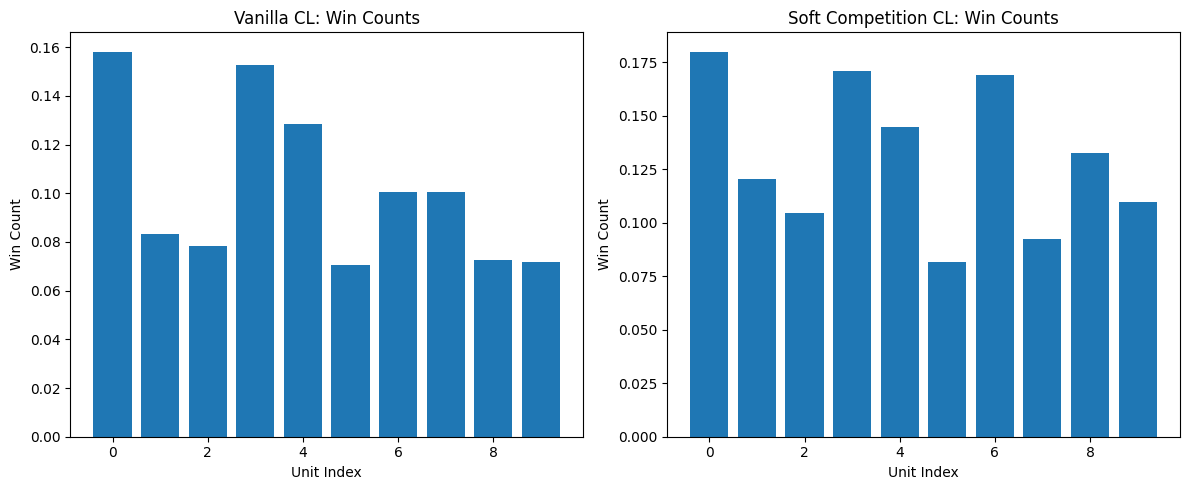

In [30]:
num_units = 10
epochs = 20

rbf_vanilla = RBFNetwork()
centers_vanilla, wins_vanilla, _ = rbf_vanilla.fit_rbf_units(x_train, num_units, epochs, use_soft_competition=False)

rbf_soft = RBFNetwork()
centers_soft, wins_soft, _ = rbf_soft.fit_rbf_units(x_train, num_units, epochs, use_soft_competition=True, k_winners=4)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(range(num_units), wins_vanilla)
plt.title('Vanilla CL: Win Counts')
plt.xlabel('Unit Index')
plt.ylabel('Win Count')

plt.subplot(1, 2, 2)
plt.bar(range(num_units), wins_soft)
plt.title('Soft Competition CL: Win Counts')
plt.xlabel('Unit Index')
plt.ylabel('Win Count')

plt.tight_layout()
plt.show()


**No outliers true, but dead units are about underutilization, not data outliers. The continuous nature makes this a placement issue.**

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/sebastian/Documents/KTH/Year 1/DD2437 Artificial Neural Networks and Deep Architectures/lab_repo/DD2437_ANNs/lab2')
from rdf import *
from helper import *

In [63]:

ballist = np.loadtxt('datasets/ballist.dat')  
balltest = np.loadtxt('datasets/balltest.dat')


X_train = ballist[:, :2]  #angle, velocity
y_train = ballist[:, 2:]  #distance, height
X_test = balltest[:, :2]
y_test = balltest[:, 2:]

#add noise with varance of 0.1
noise = np.random.normal(0, 0.1, X_train.shape)
X_train_noisy = X_train + noise

In [71]:
rbf = RBFNetwork()
centers, widths, aqe = rbf.fit_rbf_units(X_train_noisy, num_units=10, epochs=50, 
                                        eta=0.2, use_soft_competition=True, k_winners=3)

# batch mode
rbf.fit(X_train_noisy, y_train)  
mse_batch = mse(y_test, rbf.predict(X_test))

rbf = RBFNetwork()
centers, widths, aqe = rbf.fit_rbf_units(X_train_noisy, num_units=10, epochs=50, 
                                        eta=0.2, use_soft_competition=True, k_winners=3)

# online training
train_mse, test_mse = rbf.fit_online(X_train_noisy, y_train, X_test, y_test, eta=0.01, num_epoch=100)


y_pred_train = rbf.predict(X_train_noisy)
y_pred_test = rbf.predict(X_test)
train_mse_final = mse(y_train, y_pred_train)
test_mse_final = mse(y_test, y_pred_test)
print(f"Final Train MSE: {train_mse_final}, Test MSE: {test_mse_final}")

Final wins per Unit: [11. 15.  8. 11.  8.  6.  9. 13. 12.  7.]
Average Quantization Error (AQE): 0.5185758588697462
Average Distance per Unit: [0.50948856 0.48417056 0.54350154 0.56729916 0.49656655 0.517517
 0.5284484  0.51028437 0.49162476 0.5368577 ]
Computed widths (sigma): [0.07330364 0.06995364 0.06202308 0.05696269 0.09126006 0.10218136
 0.07327805 0.07683627 0.08899553 0.12287172]
Final centers:
 [[0.71995381 0.75338383]
 [0.77678637 0.59691758]
 [0.48184461 0.11993276]
 [0.1711454  0.78776255]
 [0.72973609 0.71841836]
 [0.14433121 0.60053456]
 [0.8402702  0.315401  ]
 [0.2299002  0.26595027]
 [0.17704623 0.45669361]
 [0.79597203 0.24247731]]
Final wins per Unit: [11. 15.  8. 11.  8.  6.  9. 13. 12.  7.]
Average Quantization Error (AQE): 0.5185758588697462
Average Distance per Unit: [0.50948856 0.48417056 0.54350154 0.56729916 0.49656655 0.517517
 0.5284484  0.51028437 0.49162476 0.5368577 ]
Computed widths (sigma): [0.07330364 0.06995364 0.06202308 0.05696269 0.09126006 0.1021

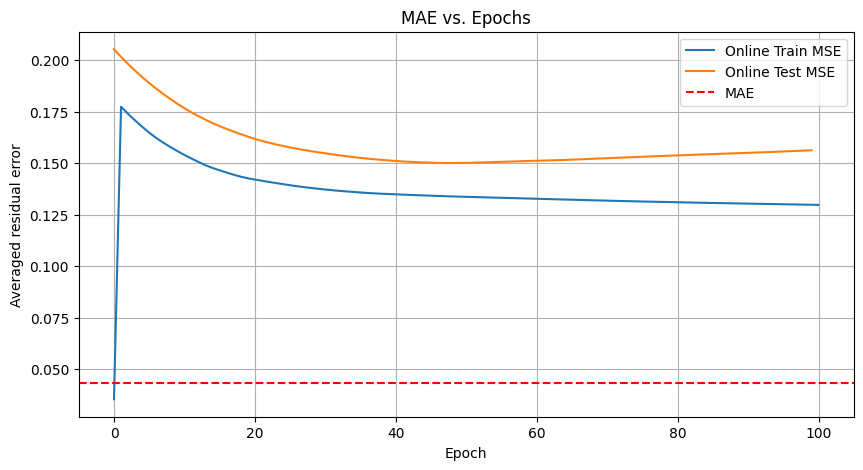

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(train_mse, label='Online Train MSE')
plt.plot(test_mse, label='Online Test MSE')
plt.axhline(y=mse_batch, color='red', linestyle='--', label='MAE')
plt.xlabel('Epoch')
plt.ylabel('Averaged residual error')
plt.title('MAE vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()


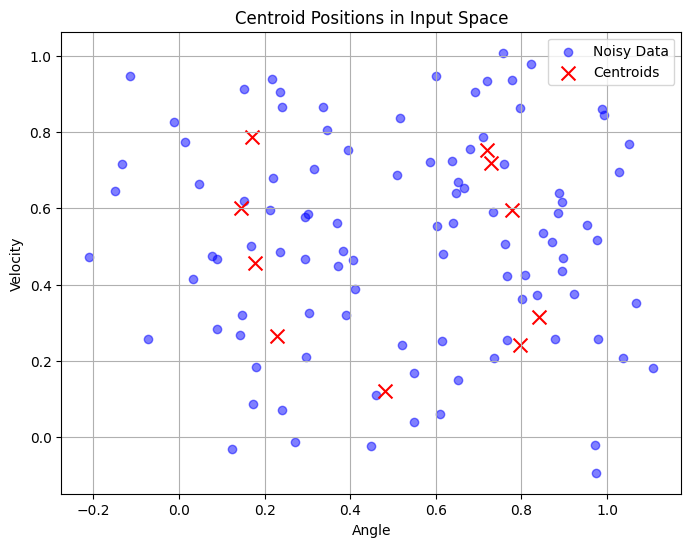

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_noisy[:, 0], X_train_noisy[:, 1], c='blue', alpha=0.5, label='Noisy Data')
plt.scatter(rbf.centers[:, 0], rbf.centers[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Angle')
plt.ylabel('Velocity')
plt.title('Centroid Positions in Input Space')
plt.legend()
plt.grid(True)
plt.show()

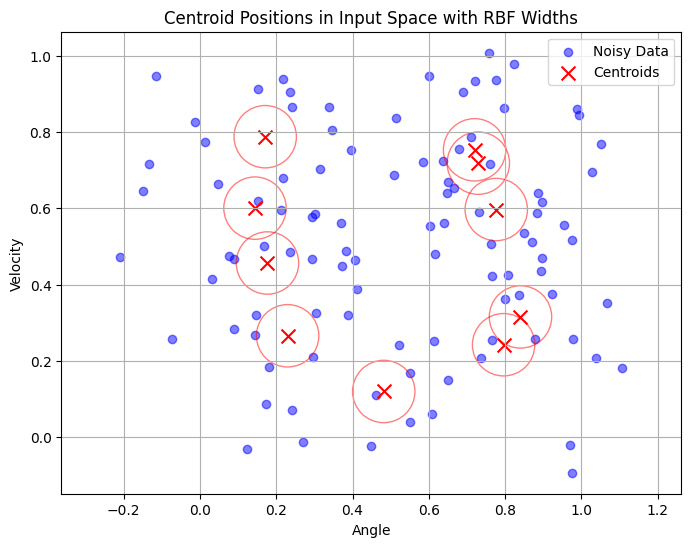

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_noisy[:, 0], X_train_noisy[:, 1], c='blue', alpha=0.5, label='Noisy Data')
plt.scatter(rbf.centers[:, 0], rbf.centers[:, 1], c='red', marker='x', s=100, label='Centroids')


sigma = rbf.sigma 
for center in rbf.centers:
    circle = plt.Circle((center[0], center[1]), sigma, fill=False, color='red', alpha=0.5, linewidth=1)
    plt.gca().add_patch(circle)

plt.xlabel('Angle')
plt.ylabel('Velocity')
plt.title('Centroid Positions in Input Space with RBF Widths')
plt.legend()
plt.grid(True)
plt.axis('equal')  
plt.show()